<a href="https://colab.research.google.com/github/Ayat166/mnist-DL-Model/blob/main/mnistDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def one_hot_encode(labels, num_classes):
    num_labels = labels.shape[0]
    encoded_labels = np.zeros((num_labels, num_classes))
    for i in range(num_labels):
        encoded_labels[i][labels[i]] = 1
    return encoded_labels

In [2]:
def initialize_weights(X,layer_sizes):
    weights = [np.random.randn(X.shape[1], layer_sizes[0]) * np.sqrt(2 / X.shape[1])]
    print("wights = " , np.shape(weights))
    for i in range(1, len(layer_sizes)):
        weight_matrix = np.random.randn(layer_sizes[i-1], layer_sizes[i]) * np.sqrt(2 / layer_sizes[i-1])
        weights.append(weight_matrix)
    return weights

def initialize_biases(layer_sizes):
    biases = [np.zeros((1, size)) for size in layer_sizes]
    # print("bias0 = " , np.shape(biases[0]))
    # print("bias1 = " , np.shape(biases[1]))
    # if len(layer_sizes) == 3:
    #   print("bias2 = " , np.shape(biases[2]))
    return biases

In [3]:
def forward_pass(X, weights, biases):
    activations = [X]
    layer_outputs = []

    for i in range(len(weights)):
        layer_output = np.dot(activations[i], weights[i]) + biases[i]
        layer_outputs.append(layer_output)
        activation = sigmoid(layer_output)
        activations.append(activation)

    output = activations[-1]
    return activations, layer_outputs, output


In [4]:
def backward_pass(X, y, activations, layer_outputs, output, weights, biases, learning_rate):

    num_layers = len(weights)
    deltas = [None] * num_layers
    deltas[-1] = (y - output) * sigmoid_derivative(output)
    # print("deltas0 = " , np.shape(deltas[0]))
    # print("deltas1 = " , np.shape(deltas[1]))

    # print("deltas output layer only and hidden layer equal none for now = " , deltas)
    for i in reversed(range(num_layers - 1)):
        deltas[i] = np.dot(deltas[i+1], weights[i+1].T) * sigmoid_derivative(activations[i+1])
    # print("deltas0 = " , np.shape(deltas[0]))
    # print("deltas1 = " , np.shape(deltas[1]))
    # print("deltas hidden layer with output layer = " , deltas)
    for i in range(num_layers):
        gradients = np.dot(activations[i].T, deltas[i]) / X.shape[0]
        weights[i] += learning_rate * gradients
        biases[i] += learning_rate * np.mean(deltas[i], axis=0, keepdims=True)


In [5]:
def train_neural_network(X_train, y_train, layer_sizes, epochs, learning_rate):
    weights = initialize_weights(X_train,layer_sizes)
    biases = initialize_biases(layer_sizes)
    loss_history = []
    print("X_train = ", np.shape(X_train))
    print("y_train = " , np.shape(y_train))
    for epoch in range(epochs):
        activations, layer_outputs, output = forward_pass(X_train, weights, biases)
        # if epoch == 2 :
        #   print("activations0 = " ,np.shape(activations[0]))
        #   print("activations1 = " ,np.shape(activations[1]))
        #   print("layer_outputs0 = " ,np.shape(layer_outputs[0]))
        #   print("layer_outputs1 = " ,np.shape(layer_outputs[1]))
        #   if len(layer_sizes) == 3:
        #      print("layer_outputs2 = " ,np.shape(layer_outputs[2]))
        #   print("output = ",output.shape)
        loss = mse_loss(y_train, output)
        loss_history.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

        backward_pass(X_train, y_train, activations, layer_outputs, output, weights, biases, learning_rate)

    plt.plot(range(epochs), loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs')
    plt.show()
    # print("updated Weights0 = " ,np.shape(weights[0]) )
    # print("updated Weights1 = " ,np.shape(weights[1]) )
    # if len(layer_sizes)==3:
    #   print("updated Weights2 = " ,np.shape(weights[2]) )
    # print("updated biases0 = " ,np.shape(biases[0]) )
    # print("updated biases1 = " ,np.shape(biases[1]) )
    # if len(layer_sizes)==3:
    #   print("updated biases2 = " ,np.shape(biases[2]) )
    return weights, biases


In [6]:
def predict(X, weights, biases):
    activations, _, output = forward_pass(X, weights, biases)
    predictions = np.argmax(output, axis=1)
    return predictions

In [7]:

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# Apply one-hot encoding to labels
num_classes = 10
y_train_encoded = one_hot_encode(y_train, num_classes)
y_test_encoded = one_hot_encode(y_test, num_classes)

def NN(X, y, num_of_layers, size_of_layers, epochs=1000, learning_rate=0.25):
    weights, biases = train_neural_network(X, y, size_of_layers, epochs, learning_rate)
    return weights, biases

# Define the architectures
layer_sizes_2 = [ 20, 10]
layer_sizes_3a = [ 20, 30, 10]
layer_sizes_3b = [ 30, 20, 10]


Neural Network with 2 layers (20 neurons, 10 neurons):
wights =  (1, 784, 20)
X_train =  (60000, 784)
y_train =  (60000, 10)
Epoch 0: Loss = 0.2812
Epoch 100: Loss = 0.0621
Epoch 200: Loss = 0.0508
Epoch 300: Loss = 0.0431
Epoch 400: Loss = 0.0378
Epoch 500: Loss = 0.0339
Epoch 600: Loss = 0.0310
Epoch 700: Loss = 0.0287
Epoch 800: Loss = 0.0269
Epoch 900: Loss = 0.0255


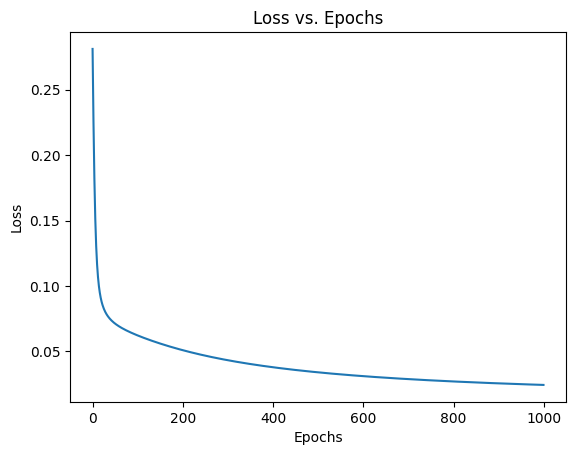

Accuracy: 0.8934

Neural Network with 3 layers (20 neurons, 30 neurons, 10 neurons):
wights =  (1, 784, 20)
X_train =  (60000, 784)
y_train =  (60000, 10)
Epoch 0: Loss = 0.3127
Epoch 100: Loss = 0.0871
Epoch 200: Loss = 0.0841
Epoch 300: Loss = 0.0806
Epoch 400: Loss = 0.0764
Epoch 500: Loss = 0.0717
Epoch 600: Loss = 0.0667
Epoch 700: Loss = 0.0619
Epoch 800: Loss = 0.0574
Epoch 900: Loss = 0.0533


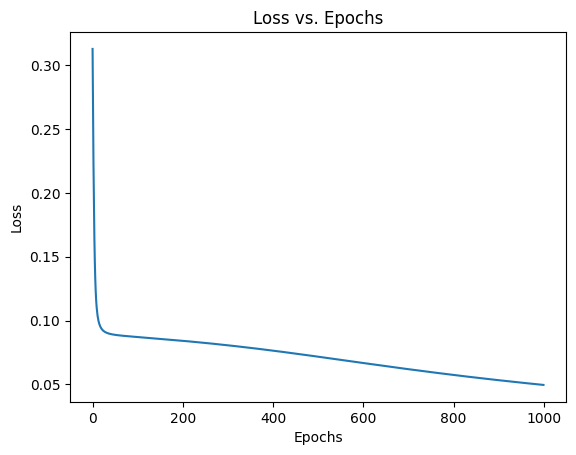

Accuracy: 0.7564

Neural Network with 3 layers (30 neurons, 20 neurons, 10 neurons):
wights =  (1, 784, 30)
X_train =  (60000, 784)
y_train =  (60000, 10)
Epoch 0: Loss = 0.2730
Epoch 100: Loss = 0.0867
Epoch 200: Loss = 0.0836
Epoch 300: Loss = 0.0797
Epoch 400: Loss = 0.0749
Epoch 500: Loss = 0.0696
Epoch 600: Loss = 0.0643
Epoch 700: Loss = 0.0593
Epoch 800: Loss = 0.0545
Epoch 900: Loss = 0.0502


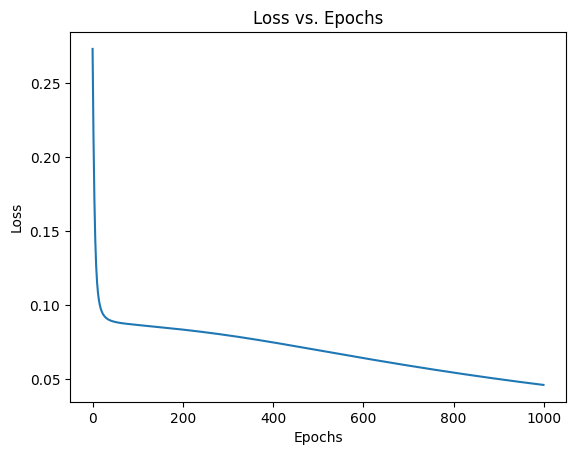

Accuracy: 0.8239


In [9]:
# Train and test the models
print("Neural Network with 2 layers (20 neurons, 10 neurons):")
weights_2_layers, biases_2_layers = NN(X_train, y_train_encoded, 2, layer_sizes_2)
predictions_2_layers = predict(X_test, weights_2_layers, biases_2_layers)
accuracy_2_layers = accuracy_score(y_test, predictions_2_layers)
print("Accuracy:", accuracy_2_layers)

print("\nNeural Network with 3 layers (20 neurons, 30 neurons, 10 neurons):")
weights_3_layers_a, biases_3_layers_a = NN(X_train, y_train_encoded, 3, layer_sizes_3a)
predictions_3_layers_a = predict(X_test, weights_3_layers_a, biases_3_layers_a)
accuracy_3_layers_a =  accuracy_score(y_test, predictions_3_layers_a)
print("Accuracy:", accuracy_3_layers_a)

print("\nNeural Network with 3 layers (30 neurons, 20 neurons, 10 neurons):")
weights_3_layers_b, biases_3_layers_b = NN(X_train, y_train_encoded, 3, layer_sizes_3b)
predictions_3_layers_b = predict(X_test, weights_3_layers_b, biases_3_layers_b)
accuracy_3_layers_b = accuracy_score(y_test, predictions_3_layers_b)
print("Accuracy:", accuracy_3_layers_b)
